In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

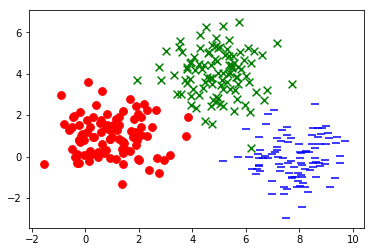

In [4]:
x1_label0 = np.random.normal(1, 1, (100, 1)) 
x2_label0 = np.random.normal(1, 1, (100, 1)) 
x1_label1 = np.random.normal(5, 1, (100, 1)) 
x2_label1 = np.random.normal(4, 1, (100, 1)) 
x1_label2 = np.random.normal(8, 1, (100, 1)) 
x2_label2 = np.random.normal(0, 1, (100, 1)) 

plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60) 
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60) 
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60) 
plt.show()

In [5]:
xs_label0 = np.hstack((x1_label0, x2_label0)) 
xs_label1 = np.hstack((x1_label1, x2_label1)) 
xs_label2 = np.hstack((x1_label2, x2_label2)) 
xs = np.vstack((xs_label0, xs_label1, xs_label2))

In [6]:
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * 
len(x1_label1) + [[0., 0., 1.]] * len(x1_label2)) 

arr = np.arange(xs.shape[0]) 
np.random.shuffle(arr) 
xs = xs[arr, :] 
labels = labels[arr, :] 

test_x1_label0 = np.random.normal(1, 1, (10, 1)) 
test_x2_label0 = np.random.normal(1, 1, (10, 1)) 
test_x1_label1 = np.random.normal(5, 1, (10, 1)) 
test_x2_label1 = np.random.normal(4, 1, (10, 1)) 
test_x1_label2 = np.random.normal(8, 1, (10, 1)) 
test_x2_label2 = np.random.normal(0, 1, (10, 1)) 
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0)) 
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1)) 
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2)) 
test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2)) 

test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10) 
train_size, num_features = xs.shape

In [7]:
import tensorflow as tf

learning_rate = 0.01 
training_epochs = 1000 
num_labels = 3 
batch_size = 100 

X = tf.placeholder("float", shape=[None, num_features]) 
Y = tf.placeholder("float", shape=[None, num_labels]) 
W = tf.Variable(tf.zeros([num_features, num_labels])) 
b = tf.Variable(tf.zeros([num_labels])) 
y_model = tf.nn.softmax(tf.matmul(X, W) + b) 
cost = -tf.reduce_sum(Y * tf.log(y_model)) 
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [18]:
with tf.Session() as sess: 
    tf.global_variables_initializer().run() 
    for step in range(training_epochs * train_size // batch_size): 
        offset = (step * batch_size) % train_size 
        batch_xs = xs[offset:(offset + batch_size), :] 
        batch_labels = labels[offset:(offset + batch_size)] 
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels}) 
#         print (step, err)
    W_val = sess.run(W) 
    print('w', W_val) 
    b_val = sess.run(b) 
    print('b', b_val) 
    print("accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))


w [[-2.10997     0.25980452  1.8501681 ]
 [-0.80521154  1.878801   -1.07359   ]]
b [10.668396  -3.1089945 -7.559408 ]
accuracy 1.0


### Visualisasi